# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
from scipy import stats

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

    Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.shape

(130, 3)

11.0


C:\Users\dxd4380\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\dxd4380\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


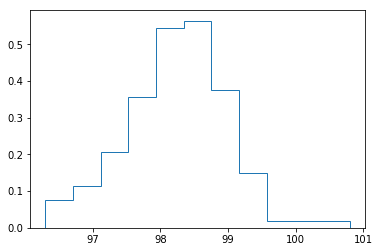

In [5]:
#Use square root rule to choose number of bins
n_bins = np.round_(np.sqrt(len(df['temperature'])),decimals=0)
print(n_bins)
plt.hist(df['temperature'], bins=n_bins, normed=True, histtype='step')

plt.show()

The distribution does not look to be normal

### 2. Is the sample size large? Are the observations independent?

    Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

 Central limit theorem applies as the sample size is quite larger than 30. Hence, the mean of the sampling distribution of the sample proportion is going to be close to the population mean.

### 3. Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

In this case, one sample test would be used as we are comparing one set of data(from the 130 samples provided) to a single number(value reported by Carl Wunderlich in a famous 1868 book i.e. 37C or 98.6F)

Z score is a better test since sample size is greater than 30.


In [14]:
# Score (Same formula for T or Z) calculation using the mean from Carl Wunderlich
# T = (X – μ) / [ s/√(n) ]

from statsmodels.stats.weightstats import ztest
print("Z Score is:",ztest(df['temperature'],value=98.6,alternative='two-sided', usevar='pooled', ddof=1.0))

import scipy as spy
from scipy import stats
print("T Score is:",spy.stats.mstats.ttest_1samp(df['temperature'],98.6))

Z Score is: (-5.4548232923645195, 4.9021570141012155e-08)
T Score is: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561318e-07)


##### Both statistics indicate that is is not likely that the normal body temperature is 98.6 based on the sample data

### 4. Draw a small sample of size 10 from the data and repeat both tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [18]:
np.random.seed(42)
sample = np.random.choice(df['temperature'], size=10)
# T Score calculation using the mean from Carl Wunderlich
# T = (X – μ) / [ s/√(n) ]
# X = Sample mean
#mu(μ)= Population mean
#s= standard deviation of the sample

from statsmodels.stats.weightstats import ztest
print("Z Score is:",ztest(sample,value=98.6, usevar='pooled', ddof=1.0))

import scipy as spy
from scipy import stats
print("T Score is:",spy.stats.mstats.ttest_1samp(sample,98.6))

Z Score is: (-3.0934479202257976, 0.0019784527476214603)
T Score is: Ttest_1sampResult(statistic=-3.0934479202257976, pvalue=0.012857704604809369)


Since the sample size is 10, T statistic is a better test. The probability of observing body temperature value equally or more extreme than the population mean is 1.2%

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 

In [20]:
import statsmodels.stats.api as sms
sms.DescrStatsW((df['race']=='b')).tconfint_mean()

(98.122002905608028, 98.376458632853499)

##### Based on the sample if the body temperatures fall outside the above range, they can be considered abnormal

 ### Is there a significant difference between males and females in normal temperature?
   <li> 
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

Two sample T test can be used to test for difference between female and male temperatures
Test null hypothesis: There is no difference between the temperatures of Males and Females

Formula used to calculate the Z score is (Mean1-Mean2)/square root of((Variance 1/sample size 1)+(Variance 2/sample size 2))

In [26]:
marr=np.array(df[(df['gender']=='M')]['temperature'])
farr=np.array(df[(df['gender']=='F')]['temperature'])
print("Z Score is:",ztest(marr,farr,value=0,alternative='two-sided', usevar='pooled', ddof=1.0))

Z Score is: (-2.2854345381656103, 0.02228736076065755)


##### For a Critical value of 0.05 on both sides of Z is 1.96. Z is less than 1.96 so the null hypothesis can be rejected. Men have temperature lower than women. 

Conclusion:
    - The temperatures in the sample are not a true representation of the population as the population mean is outside the 95% confidence interval of the sample population.
    - Based on the given sample, there is a siginificant difference between the temperatures of men and women.

Consulted Resources:

Reference: Section 3, Bootstrap hypothesis tests<br>
https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=1

In the example, work of two scientists Michelson and Newcomb in the Average speed of light is compared. For Michelson's experiement the data is available and for Newcomb only the data is available.

Central Limit theorem
https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem

How much sample size is large enough for the sample mean to be normal?
http://www.dummies.com/education/math/statistics/the-central-limit-theorem-whats-large-enough/

What is the difference between t statistic and z statistic?
https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/z-statistics-vs-t-statistics

http://www.statisticshowto.com/t-statistic/

Margin of Error
https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample/estimating-population-proportion/v/margin-of-error-1

### Manual calculation of two sample T test

In [23]:
#### Confidence interval of difference
# Calculate difference in mean

mu_m=np.mean(df[(df['gender']=='M')]['temperature'])
mu_f=np.mean(df[(df['gender']=='F')]['temperature'])

diff_mu=np.subtract(mu_m,mu_f)
print("Difference between temperatures of Males and Females from the Sample is",diff_mu)

#Calculate standard deviation of the difference
#Standard dev of difference=square root of (Variation of male temperatures + Variance of female temperatures)

#Variance of male temperatures
n1=df[(df['gender']=='M')].count()['temperature']
var_m=np.var(df[(df['gender']=='M')]['temperature'])/n1
n2=df[(df['gender']=='F')].count()['temperature']
var_f=np.var(df[(df['gender']=='F')]['temperature'])/n2

#Add both variances
var_diff=np.add(var_m,var_m)

#Calculate standard deviation as the square root of variance
sd_diff=np.sqrt(var_diff)

#calculate the 95% confidence interval
#distance between the mean and the 97.5 percentile value
d=np.multiply(1.96,sd_diff)

#95% confidence interval point
print("95% Confidence interval of the difference in means between Male and Female temperatures is between {} and {}".format(np.subtract(diff_mu,d),np.add(diff_mu,d)))

Difference between temperatures of Males and Females from the Sample is -0.289230769231
95% Confidence interval of the difference in means between Male and Female temperatures is between -0.5276125731325715 and -0.05084896532888247


In [25]:
#Calculating the denominator

z=diff_mu/np.sqrt(var_m+var_f)
z
print(diff_mu)

-0.289230769231
